In [1]:
import tensorflow as tf
from tensorflow.keras import datasets, models, layers, utils, losses # tf.keras 에 필요한 함수들이 모여있습니다.

In [2]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2' # https://stackoverflow.com/questions/35911252/disable-tensorflow-debugging-information

#### Prepare train & test data(MNIST)
Train - Test split

In [3]:
(train_data, train_label), (test_data, test_label) = datasets.mnist.load_data()

In [4]:
print(train_data.shape) # # of training data == 60000, each data = 28px * 28px
print(test_data.shape) # # of test data == 10000

(60000, 28, 28)
(10000, 28, 28)


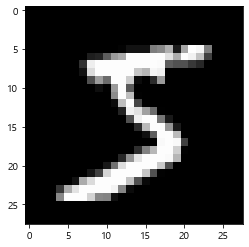

In [5]:
import matplotlib.pyplot as plt

plt.imshow(train_data[0], cmap='gray') # 60000장의 train data 중 첫번째 data

#### Normalization

In [6]:
# 각 이미지(28px * 28px)는 0~255 사이의 숫자로 이루어져 있습니다.

print(train_data.min())
print(train_data.max()) 

0
255


In [7]:
# 각 이미지를 [28행 x 28열]에서 [1행 x 784열]로 펼쳐줍니다. 
# 각 이미지 내의 pixel 값을 [0~255]에서 [0~1]로 바꿔줍니다.

train_data = train_data.reshape(60000, 784) / 255.0
test_data = test_data.reshape(10000, 784) / 255.0

In [8]:
train_data.shape

(60000, 784)

#### One-Hot encoding

In [9]:

train_label = utils.to_categorical(train_label) # 0~9 -> one-hot vector
test_label = utils.to_categorical(test_label) # 0~9 -> one-hot vector

In [10]:
# 기존의 integer label들이 아래와 같은 one-hot vector들로 변경된 것을 확인할 수 있습니다.

import pandas as pd

pd.DataFrame(train_label).head(3)

,0,1,2,3,4,5,6,7,8,9
0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


#### Build the model & Set the creiterion

In [ ]:
tf.keras 방식

- Sequential
- Functional

In [11]:
# Build up the 'Sequence' of layers (Linear stack of layers)
model = models.Sequential()

In [12]:
## kener_initializer: Theta 초기화 (default=자비에)

# Dense-layer (relu & he)
model.add(layers.Dense(input_dim=28*28, units=512, activation='relu', kernel_initializer='he_uniform'))

# Dropout-layer
model.add(layers.Dropout(0.2))

# (Output) Dense_layer with softmax function, 0~9 -> 10
model.add(layers.Dense(units=10, activation='softmax'))

In [13]:
# 'Compile' the model description (Configures the model for training)
model.compile(optimizer = 'adam',
              # See other available olsses
             loss = losses.categorical_crossentropy,
              # tf 2.X에서 Precision/Recall/F1-Score 적용하기 @ https://j.mp/3cf3lbi
             metrics = ['accuracy'])

In [14]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 512)               401920    
_________________________________________________________________
dropout (Dropout)            (None, 512)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)                5130      
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# # Regression
# model.add(layers.Dense(units=1, activation=None))
# model.compile(optimizer='adam',
#               loss=losses.mean_squared_error,
#               metrics=['mean_squared_error']) 

# # Multi-class classification
## units: class의 개수
## 보통 loss는 categorical_crossentropy 사용

# model.add(layers.Dense(units=10, activation='softmax'))
# model.compile(optimizer='adam',
#               loss=losses.categorical_crossentropy,        # <- Label이 One-hot 형태일 경우
#               loss=losses.sparse_categorical_crossentropy, # <- Label이 One-hot 형태가 아닐 경우
#               metrics=['accuracy']) 

# # Binary Classification 1 (Softmax를 적용하는 경우, recommended)
# model.add(layers.Dense(units=2, activation='softmax'))
# model.compile(optimizer='adam',
#               loss=losses.categorical_crossentropy,
#               metrics=['accuracy']) 

# # Binary Classification 2 (Sigmoid를 적용하는 경우)
# # 선형결합 결과에 대해 sigmoid function의 output을 계산해주면, binary_crossentropy가 이를 음성 & 양성 확률로 변환하여 처리해줍니다.
# model.add(layers.Dense(units=1, activation='sigmoid')) 
# model.compile(optimizer='adam',
#               loss=losses.binary_crossentropy, 
#               metrics=['accuracy']) 

#### Training the model

In [15]:
# Fit the model on training data

model.fit(train_data, train_label, batch_size=100, epochs=10) # default batch_size = 32

Epoch 1/10
600/600 [==============================] - 2s 2ms/step - loss: 0.2736 - accuracy: 0.9202
Epoch 2/10
600/600 [==============================] - 1s 2ms/step - loss: 0.1150 - accuracy: 0.9667
Epoch 3/10
600/600 [==============================] - 1s 2ms/step - loss: 0.0796 - accuracy: 0.9760
Epoch 4/10
600/600 [==============================] - 1s 2ms/step - loss: 0.0598 - accuracy: 0.9820
Epoch 5/10
600/600 [==============================] - 1s 2ms/step - loss: 0.0466 - accuracy: 0.9857
Epoch 6/10
600/600 [==============================] - 1s 2ms/step - loss: 0.0387 - accuracy: 0.9879
Epoch 7/10
600/600 [==============================] - 1s 2ms/step - loss: 0.0316 - accuracy: 0.9902
Epoch 8/10
600/600 [==============================] - 1s 2ms/step - loss: 0.0268 - accuracy: 0.9914
Epoch 9/10
600/600 [==============================] - 1s 2ms/step - loss: 0.0224 - accuracy: 0.9931
Epoch 10/10
600/600 [==============================] - 1s 2ms/step - loss: 0.0196 - accuracy: 0.9935

#### Test the model

In [17]:
# Evaluate the model on test data

result = model.evaluate(test_data, test_label, batch_size=100)

100/100 [==============================] - 0s 4ms/step - loss: 0.0644 - accuracy: 0.9817


In [18]:
model.predict(test_data[0:1, :])

array([[2.1511974e-11, 6.0798637e-11, 4.6680061e-08, 2.7555676e-05,
        3.4137820e-14, 8.0739254e-10, 8.1520850e-14, 9.9997222e-01,
        5.5675828e-09, 1.1920069e-07]], dtype=float32)

In [20]:
import numpy as np
np.sum(model.predict(test_data[0:1, :]))

0.99999994

In [22]:
print('loss (cross-entropy)', result[0])
print('test accuracy', result[1])

loss (cross-entropy) 0.06437882035970688
test accuracy 0.9817000031471252


#### (Appendix 1) tf.keras.layers.Flatten() 활용법

In [ ]:
(train_data, train_label), (test_data, test_label) = datasets.mnist.load_data()

# 아래 코드에서 reshape 적용을 생략하고, 대신 Flatten 레이어를 활용해 펼쳐낼 수 있습니다.
# train_data = train_data.reshape(60000, 784) / 255.0
# test_data = test_data.reshape(10000, 784) / 255.0

train_data = train_data / 255.0
test_data = test_data / 255.0

train_label = utils.to_categorical(train_label)
test_label = utils.to_categorical(test_label)


model = models.Sequential() 

model.add(layers.Flatten()) # takes our 28x28 and makes it 1x784

# model.add(layers.Dense(input_dim=28*28, units=512, activation='relu', kernel_initializer='he_uniform')) 
model.add(layers.Dense(units=512, activation=tf.nn.relu, kernel_initializer='he_uniform')) # tf.nn 활용이 가능합니다.
model.add(layers.Dropout(0.2))
model.add(layers.Dense(units=10, activation=tf.nn.softmax)) # tf.nn 활용이 가능합니다.

model.compile(optimizer='adam', 
              loss=losses.categorical_crossentropy, 
              metrics=['accuracy'])

model.fit(train_data, train_label, batch_size=100, epochs=10) 

result = model.evaluate(test_data, test_label, batch_size=100)
print('loss (cross-entropy) :', result[0])
print('test accuracy :', result[1])